In [1]:

# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

# Imported Libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
#from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from imblearn.combine import SMOTEENN,SMOTETomek
        
# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")


In [164]:
df=pd.read_csv('train.csv')

In [165]:
df.head()

,outcome,categorical,numeric
0,0,3.0,41.0
1,0,1.0,41.0
2,0,3.0,44.0
3,0,3.0,NaN
4,0,NaN,40.0


In [166]:
df.describe()

,outcome,categorical,numeric
count,195.000000,190.000000,191.000000
mean,0.605128,2.000000,52.178010
std,1.041893,0.690066,8.921868
min,0.000000,1.000000,33.000000
25%,0.000000,2.000000,45.000000
50%,0.000000,2.000000,52.000000
75%,1.000000,2.000000,58.000000
max,6.000000,3.000000,75.000000


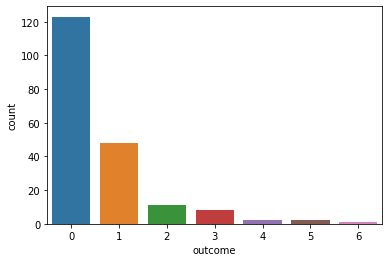

In [167]:
sns.countplot('outcome' , data=df)
#, legand=df['outcome'].value_counts())

Therefore ,the data is multiclass classification along with class imbalance

In [168]:
df['outcome'].value_counts()

0    123
1     48
2     11
3      8
5      2
4      2
6      1
Name: outcome, dtype: int64

In [169]:
df

,outcome,categorical,numeric
0,0,3.0,41.0
1,0,1.0,41.0
2,0,3.0,44.0
3,0,3.0,NaN
4,0,NaN,40.0
...,...,...,...
190,0,2.0,69.0
191,1,2.0,NaN
192,2,2.0,71.0
193,5,2.0,71.0


In [170]:
len(df)

195

Here we are having count of data points for 4,5,6 class variables are less than 6, In order to apply any upsampling techniques 
we need to have atleast 6 data points for each class variable . Therefore I am adding 4,4,5 more variables for 4,5,6 class variables. The len(df) will become 


In [171]:
df_4=df[df.outcome.eq(4)]
df_4

,outcome,categorical,numeric
163,4,2.0,62.0
181,4,2.0,70.0


In [172]:
df_6=df[df.outcome.eq(6)]
df_6

,outcome,categorical,numeric
180,6,2.0,69.0


In [173]:
df_5=df[df.outcome.eq(5)]
df_5

,outcome,categorical,numeric
156,5,2.0,61.0
193,5,2.0,71.0


In [174]:
df=df.append([df_5]*5,ignore_index=True)
df=df.append([df_4]*5,ignore_index=True)
df=df.append([df_6]*10,ignore_index=True)
len(df)

225

In [175]:
len(df)

225

In [176]:
df['outcome'].value_counts()

0    123
1     48
5     12
4     12
6     11
2     11
3      8
Name: outcome, dtype: int64

In [177]:
# Checking for null values in data set

df.isnull().sum()

outcome        0
categorical    5
numeric        4
dtype: int64

In [178]:
for e in df.columns:
    print(df[e].value_counts())

0    123
1     48
5     12
4     12
6     11
2     11
3      8
Name: outcome, dtype: int64
2.0    130
1.0     45
3.0     45
Name: categorical, dtype: int64
57.0    13
69.0    12
61.0    12
40.0    10
54.0    10
49.0     9
62.0     9
51.0     8
46.0     8
56.0     7
43.0     7
45.0     7
50.0     7
53.0     7
71.0     7
41.0     7
39.0     6
58.0     6
52.0     6
42.0     6
70.0     6
55.0     5
60.0     5
48.0     5
63.0     5
64.0     5
66.0     4
44.0     4
47.0     3
38.0     2
67.0     2
72.0     2
65.0     2
59.0     2
37.0     1
33.0     1
68.0     1
75.0     1
35.0     1
Name: numeric, dtype: int64


In [179]:
df.columns

Index(['outcome', 'categorical', 'numeric'], dtype='object')

In [180]:
df['categorical'].fillna(df['categorical'].mode()[0], inplace=True) # filling missing values with mode
df['numeric'].fillna(df['numeric'].mean(), inplace=True)# filling missing values with mean

In [181]:
#  As we already have very less data so I am not taking care of feature selection and feature engineering techniques.

In [182]:
training_features, training_target=df.iloc[:,1:],df.iloc[:,0]

In [183]:
x_train, x_val, y_train, y_val = train_test_split(training_features, training_target, \
                                                  test_size =0.2, \
                                                  random_state=12)


## RandomOverSampler

In [184]:
from imblearn.over_sampling import RandomOverSampler
#sm=SMOTE(sampling_strategy='not majority').fit_resample(x_train,y_train)

ros = RandomOverSampler(random_state=4)
X_res, y_res = ros.fit_resample(x_train,y_train)

In [185]:
len(X_res), y_res.value_counts()

(693,
 6    99
 5    99
 4    99
 3    99
 2    99
 1    99
 0    99
 Name: outcome, dtype: int64)

In [186]:
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000,0.005,0.05,0.5,5,15,25,50]}
knears_params = {"n_neighbors": list(range(2,10,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
svc_params = {'C': np.linspace(0.1,1.0,10), 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,10,1)), 
              "min_samples_leaf": list(range(1,10,1)),"min_samples_split":[2, 5, 10, 15, 100], 
               "n_estimators":[int(x) for x in np.linspace(start = 1, stop = 100, num =100)]}

lg =LogisticRegression()
#https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=1)

lg_random = RandomizedSearchCV(estimator = lg, param_distributions =log_reg_params,scoring='f1_weighted', n_iter = 10, cv = cv, verbose=2, random_state=4, n_jobs = 1)



lg_random.fit(X_res, y_res)


Fitting 50 folds for each of 10 candidates, totalling 500 fits
[CV] END ..................................C=0.5, penalty=l2; total time=   0.0s
[CV] END ..................................C=0.5, penalty=l2; total time=   0.0s
[CV] END ..................................C=0.5, penalty=l2; total time=   0.0s
[CV] END ..................................C=0.5, penalty=l2; total time=   0.0s
[CV] END ..................................C=0.5, penalty=l2; total time=   0.0s
[CV] END ..................................C=0.5, penalty=l2; total time=   0.0s
[CV] END ..................................C=0.5, penalty=l2; total time=   0.0s
[CV] END ..................................C=0.5, penalty=l2; total time=   0.0s
[CV] END ..................................C=0.5, penalty=l2; total time=   0.0s
[CV] END ..................................C=0.5, penalty=l2; total time=   0.0s
[CV] END ..................................C=0.5, penalty=l2; total time=   0.0s
[CV] END ..................................C=0

[CV] END ..................................C=100, penalty=l2; total time=   0.0s
[CV] END ..................................C=100, penalty=l2; total time=   0.0s
[CV] END ..................................C=100, penalty=l2; total time=   0.0s
[CV] END ..................................C=100, penalty=l2; total time=   0.1s
[CV] END ..................................C=100, penalty=l2; total time=   0.1s
[CV] END ..................................C=100, penalty=l2; total time=   0.0s
[CV] END ..................................C=100, penalty=l2; total time=   0.0s
[CV] END ..................................C=100, penalty=l2; total time=   0.0s
[CV] END ..................................C=100, penalty=l2; total time=   0.0s
[CV] END ..................................C=100, penalty=l2; total time=   0.0s
[CV] END ..................................C=100, penalty=l2; total time=   0.0s
[CV] END ..................................C=100, penalty=l2; total time=   0.0s
[CV] END ...................

[CV] END ...................................C=25, penalty=l2; total time=   0.1s
[CV] END ...................................C=25, penalty=l2; total time=   0.0s
[CV] END ...................................C=25, penalty=l2; total time=   0.0s
[CV] END ...................................C=25, penalty=l2; total time=   0.0s
[CV] END ...................................C=25, penalty=l2; total time=   0.0s
[CV] END ...................................C=25, penalty=l2; total time=   0.0s
[CV] END ...................................C=25, penalty=l2; total time=   0.1s
[CV] END ...................................C=25, penalty=l2; total time=   0.0s
[CV] END ...................................C=25, penalty=l2; total time=   0.0s
[CV] END ...................................C=25, penalty=l2; total time=   0.0s
[CV] END ...................................C=25, penalty=l2; total time=   0.0s
[CV] END ...................................C=25, penalty=l2; total time=   0.0s
[CV] END ...................

[CV] END ...................................C=25, penalty=l1; total time=   0.0s
[CV] END ...................................C=25, penalty=l1; total time=   0.0s
[CV] END ...................................C=25, penalty=l1; total time=   0.0s
[CV] END ...................................C=25, penalty=l1; total time=   0.0s
[CV] END ...................................C=25, penalty=l1; total time=   0.0s
[CV] END ...................................C=25, penalty=l1; total time=   0.0s
[CV] END ...................................C=25, penalty=l1; total time=   0.0s
[CV] END ...................................C=25, penalty=l1; total time=   0.0s
[CV] END ...................................C=25, penalty=l1; total time=   0.0s
[CV] END ...................................C=25, penalty=l1; total time=   0.0s
[CV] END ...................................C=25, penalty=l1; total time=   0.0s
[CV] END ...................................C=25, penalty=l1; total time=   0.0s
[CV] END ...................

[CV] END ................................C=0.001, penalty=l1; total time=   0.0s
[CV] END ................................C=0.001, penalty=l1; total time=   0.0s
[CV] END ................................C=0.001, penalty=l1; total time=   0.0s
[CV] END ................................C=0.001, penalty=l1; total time=   0.0s
[CV] END ................................C=0.001, penalty=l1; total time=   0.0s
[CV] END ................................C=0.001, penalty=l1; total time=   0.0s
[CV] END ................................C=0.001, penalty=l1; total time=   0.0s
[CV] END ................................C=0.001, penalty=l1; total time=   0.0s
[CV] END ................................C=0.001, penalty=l1; total time=   0.0s
[CV] END ................................C=0.001, penalty=l1; total time=   0.0s
[CV] END ................................C=0.001, penalty=l1; total time=   0.0s
[CV] END ................................C=0.001, penalty=l1; total time=   0.0s
[CV] END ...................

RandomizedSearchCV(cv=RepeatedStratifiedKFold(n_repeats=5, n_splits=10, random_state=1),
                   estimator=LogisticRegression(), n_jobs=1,
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 100,
                                              1000, 0.005, 0.05, 0.5, 5, 15, 25,
                                              50],
                                        'penalty': ['l1', 'l2']},
                   random_state=4, scoring='f1_weighted', verbose=2)

In [187]:
lg_pred=lg_random.predict(x_val)

In [188]:
lg_pred

array([3, 0, 0, 1, 1, 3, 3, 1, 6, 0, 6, 0, 0, 0, 0, 6, 6, 0, 0, 3, 0, 6,
       0, 0, 0, 0, 1, 2, 0, 0, 5, 3, 6, 1, 6, 0, 3, 3, 0, 0, 6, 0, 0, 1,
       0], dtype=int64)

In [189]:
from sklearn.metrics import confusion_matrix

log_reg_cf = confusion_matrix(y_val, lg_pred)
print(log_reg_cf)



[[19  3  0  2  0  0  0]
 [ 3  3  0  4  0  1  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  2]
 [ 0  0  0  1  0  0  2]
 [ 0  0  0  0  0  0  4]]


In [190]:
from sklearn.metrics import classification_report
print('lg Recal score : ',recall_score(y_val, lg_pred , average='weighted')) #None, 'micro', 'macro', 'weighted'].
print('lg F1 score : ',f1_score(y_val, lg_pred , average='weighted'))
print('lg Accuracy score : ',accuracy_score(y_val, lg_pred ))
print(log_reg_cf)
print(classification_report(y_val, lg_pred))



lg Recal score :  0.5777777777777777
lg F1 score :  0.5861134792081084
lg Accuracy score :  0.5777777777777777
[[19  3  0  2  0  0  0]
 [ 3  3  0  4  0  1  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  2]
 [ 0  0  0  1  0  0  2]
 [ 0  0  0  0  0  0  4]]
              precision    recall  f1-score   support

           0       0.86      0.79      0.83        24
           1       0.50      0.27      0.35        11
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         3
           6       0.50      1.00      0.67         4

    accuracy                           0.58        45
   macro avg       0.27      0.29      0.26        45
weighted avg       0.63      0.58      0.59        45



## knears_params

In [191]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections

In [192]:
knn=KNeighborsClassifier()
knn_reg=RandomizedSearchCV(estimator = knn, param_distributions =knears_params,scoring='f1_weighted', n_iter = 10, cv = cv, verbose=2, random_state=4, n_jobs = 1)


knn_reg.fit(X_res, y_res)
knn_pred=knn_reg.predict(x_val)

knn_reg_cf = confusion_matrix(y_val, knn_pred)
print(knn_reg_cf)



Fitting 50 folds for each of 10 candidates, totalling 500 fits
[CV] END ...................algorithm=kd_tree, n_neighbors=6; total time=   0.0s
[CV] END ...................algorithm=kd_tree, n_neighbors=6; total time=   0.0s
[CV] END ...................algorithm=kd_tree, n_neighbors=6; total time=   0.0s
[CV] END ...................algorithm=kd_tree, n_neighbors=6; total time=   0.0s
[CV] END ...................algorithm=kd_tree, n_neighbors=6; total time=   0.0s
[CV] END ...................algorithm=kd_tree, n_neighbors=6; total time=   0.0s
[CV] END ...................algorithm=kd_tree, n_neighbors=6; total time=   0.0s
[CV] END ...................algorithm=kd_tree, n_neighbors=6; total time=   0.0s
[CV] END ...................algorithm=kd_tree, n_neighbors=6; total time=   0.0s
[CV] END ...................algorithm=kd_tree, n_neighbors=6; total time=   0.0s
[CV] END ...................algorithm=kd_tree, n_neighbors=6; total time=   0.0s
[CV] END ...................algorithm=kd_tree,

[CV] END ...................algorithm=kd_tree, n_neighbors=3; total time=   0.0s
[CV] END ...................algorithm=kd_tree, n_neighbors=3; total time=   0.0s
[CV] END ...................algorithm=kd_tree, n_neighbors=3; total time=   0.0s
[CV] END ...................algorithm=kd_tree, n_neighbors=3; total time=   0.0s
[CV] END ...................algorithm=kd_tree, n_neighbors=3; total time=   0.0s
[CV] END ...................algorithm=kd_tree, n_neighbors=3; total time=   0.0s
[CV] END ...................algorithm=kd_tree, n_neighbors=3; total time=   0.0s
[CV] END ...................algorithm=kd_tree, n_neighbors=3; total time=   0.0s
[CV] END ...................algorithm=kd_tree, n_neighbors=3; total time=   0.0s
[CV] END ...................algorithm=kd_tree, n_neighbors=3; total time=   0.0s
[CV] END ...................algorithm=kd_tree, n_neighbors=3; total time=   0.0s
[CV] END ...................algorithm=kd_tree, n_neighbors=3; total time=   0.0s
[CV] END ...................

[CV] END .................algorithm=ball_tree, n_neighbors=5; total time=   0.0s
[CV] END .................algorithm=ball_tree, n_neighbors=5; total time=   0.0s
[CV] END .................algorithm=ball_tree, n_neighbors=5; total time=   0.0s
[CV] END .................algorithm=ball_tree, n_neighbors=5; total time=   0.0s
[CV] END .................algorithm=ball_tree, n_neighbors=5; total time=   0.0s
[CV] END .................algorithm=ball_tree, n_neighbors=5; total time=   0.0s
[CV] END .................algorithm=ball_tree, n_neighbors=5; total time=   0.0s
[CV] END .................algorithm=ball_tree, n_neighbors=5; total time=   0.0s
[CV] END .................algorithm=ball_tree, n_neighbors=5; total time=   0.0s
[CV] END .................algorithm=ball_tree, n_neighbors=5; total time=   0.0s
[CV] END .................algorithm=ball_tree, n_neighbors=5; total time=   0.0s
[CV] END .................algorithm=ball_tree, n_neighbors=5; total time=   0.0s
[CV] END .................al

[CV] END ...................algorithm=kd_tree, n_neighbors=2; total time=   0.0s
[CV] END ...................algorithm=kd_tree, n_neighbors=2; total time=   0.0s
[CV] END ...................algorithm=kd_tree, n_neighbors=2; total time=   0.0s
[CV] END ...................algorithm=kd_tree, n_neighbors=2; total time=   0.0s
[CV] END ...................algorithm=kd_tree, n_neighbors=2; total time=   0.0s
[CV] END ...................algorithm=kd_tree, n_neighbors=2; total time=   0.0s
[CV] END ...................algorithm=kd_tree, n_neighbors=2; total time=   0.0s
[CV] END ...................algorithm=kd_tree, n_neighbors=2; total time=   0.0s
[CV] END ...................algorithm=kd_tree, n_neighbors=2; total time=   0.0s
[CV] END ...................algorithm=kd_tree, n_neighbors=2; total time=   0.0s
[CV] END ...................algorithm=kd_tree, n_neighbors=2; total time=   0.0s
[CV] END ...................algorithm=kd_tree, n_neighbors=2; total time=   0.0s
[CV] END ...................

[CV] END ...................algorithm=kd_tree, n_neighbors=8; total time=   0.0s
[CV] END ...................algorithm=kd_tree, n_neighbors=8; total time=   0.0s
[CV] END ...................algorithm=kd_tree, n_neighbors=8; total time=   0.0s
[CV] END ...................algorithm=kd_tree, n_neighbors=8; total time=   0.0s
[CV] END ...................algorithm=kd_tree, n_neighbors=8; total time=   0.0s
[CV] END ...................algorithm=kd_tree, n_neighbors=8; total time=   0.0s
[CV] END ...................algorithm=kd_tree, n_neighbors=8; total time=   0.0s
[CV] END ...................algorithm=kd_tree, n_neighbors=8; total time=   0.0s
[CV] END ...................algorithm=kd_tree, n_neighbors=8; total time=   0.0s
[CV] END ...................algorithm=kd_tree, n_neighbors=8; total time=   0.0s
[CV] END ...................algorithm=kd_tree, n_neighbors=8; total time=   0.0s
[CV] END ...................algorithm=kd_tree, n_neighbors=8; total time=   0.0s
[CV] END ...................

In [193]:

print('knn Recal score : ',recall_score(y_val, knn_pred , average='weighted')) #None, 'micro', 'macro', 'weighted'].
print('knn F1 score : ',f1_score(y_val, knn_pred , average='weighted'))
print('knn Accuracy score : ',accuracy_score(y_val, knn_pred ))
print(knn_reg_cf)
print(classification_report(y_val, knn_pred))


knn Recal score :  0.6444444444444445
knn F1 score :  0.6676965546530763
knn Accuracy score :  0.6444444444444445
[[18  1  2  3  0  0  0]
 [ 4  1  1  4  0  1  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  3  0  0]
 [ 0  0  0  0  0  3  0]
 [ 0  0  0  0  0  0  4]]
              precision    recall  f1-score   support

           0       0.82      0.75      0.78        24
           1       0.50      0.09      0.15        11
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       1.00      1.00      1.00         3
           5       0.75      1.00      0.86         3
           6       1.00      1.00      1.00         4

    accuracy                           0.64        45
   macro avg       0.58      0.55      0.54        45
weighted avg       0.76      0.64      0.67        45



## SVC

In [194]:

svc_params = {'C': np.linspace(0.1,1.0,10), 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}

svc=SVC()

svc_reg=RandomizedSearchCV(estimator = svc, param_distributions =svc_params,scoring='f1_weighted', n_iter = 10, cv = cv, \
                           verbose=2, random_state=4, n_jobs = 1)


svc_reg.fit(X_res, y_res)
svc_pred=svc_reg.predict(x_val)

svc_reg_cf = confusion_matrix(y_val, svc_pred)
print(svc_reg_cf)



Fitting 50 folds for each of 10 candidates, totalling 500 fits
[CV] END ..................................C=0.8, kernel=rbf; total time=   0.0s
[CV] END ..................................C=0.8, kernel=rbf; total time=   0.0s
[CV] END ..................................C=0.8, kernel=rbf; total time=   0.0s
[CV] END ..................................C=0.8, kernel=rbf; total time=   0.0s
[CV] END ..................................C=0.8, kernel=rbf; total time=   0.0s
[CV] END ..................................C=0.8, kernel=rbf; total time=   0.0s
[CV] END ..................................C=0.8, kernel=rbf; total time=   0.0s
[CV] END ..................................C=0.8, kernel=rbf; total time=   0.0s
[CV] END ..................................C=0.8, kernel=rbf; total time=   0.0s
[CV] END ..................................C=0.8, kernel=rbf; total time=   0.0s
[CV] END ..................................C=0.8, kernel=rbf; total time=   0.0s
[CV] END ..................................C=0

[CV] END ...............C=0.7000000000000001, kernel=sigmoid; total time=   0.1s
[CV] END ...............C=0.7000000000000001, kernel=sigmoid; total time=   0.1s
[CV] END ...............C=0.7000000000000001, kernel=sigmoid; total time=   0.1s
[CV] END ...............C=0.7000000000000001, kernel=sigmoid; total time=   0.1s
[CV] END ...............C=0.7000000000000001, kernel=sigmoid; total time=   0.1s
[CV] END ...............C=0.7000000000000001, kernel=sigmoid; total time=   0.1s
[CV] END ...............C=0.7000000000000001, kernel=sigmoid; total time=   0.1s
[CV] END ...............C=0.7000000000000001, kernel=sigmoid; total time=   0.1s
[CV] END ...............C=0.7000000000000001, kernel=sigmoid; total time=   0.1s
[CV] END ...............C=0.7000000000000001, kernel=sigmoid; total time=   0.1s
[CV] END ...............C=0.7000000000000001, kernel=sigmoid; total time=   0.1s
[CV] END ...............C=0.7000000000000001, kernel=sigmoid; total time=   0.1s
[CV] END ...............C=0.

[CV] END ...............................C=0.8, kernel=linear; total time=   0.0s
[CV] END ...............................C=0.8, kernel=linear; total time=   0.0s
[CV] END ...............................C=0.8, kernel=linear; total time=   0.0s
[CV] END ...............................C=0.8, kernel=linear; total time=   0.0s
[CV] END ...............................C=0.8, kernel=linear; total time=   0.0s
[CV] END ...............................C=0.8, kernel=linear; total time=   0.0s
[CV] END ...............................C=0.8, kernel=linear; total time=   0.0s
[CV] END ...............................C=0.8, kernel=linear; total time=   0.0s
[CV] END ...............................C=0.8, kernel=linear; total time=   0.0s
[CV] END ...............................C=0.8, kernel=linear; total time=   0.0s
[CV] END ...............................C=0.8, kernel=linear; total time=   0.0s
[CV] END ...............................C=0.8, kernel=linear; total time=   0.0s
[CV] END ...................

[CV] END ..................................C=0.5, kernel=rbf; total time=   0.0s
[CV] END ..................................C=0.5, kernel=rbf; total time=   0.0s
[CV] END ..................................C=0.5, kernel=rbf; total time=   0.0s
[CV] END ..................................C=0.5, kernel=rbf; total time=   0.0s
[CV] END ..................................C=0.5, kernel=rbf; total time=   0.0s
[CV] END ..................................C=0.5, kernel=rbf; total time=   0.0s
[CV] END ..................................C=0.5, kernel=rbf; total time=   0.0s
[CV] END ..................................C=0.5, kernel=rbf; total time=   0.0s
[CV] END ..................................C=0.5, kernel=rbf; total time=   0.0s
[CV] END ..................................C=0.5, kernel=rbf; total time=   0.0s
[CV] END ..................................C=0.5, kernel=rbf; total time=   0.0s
[CV] END ..................................C=0.5, kernel=rbf; total time=   0.0s
[CV] END ...................

In [195]:
#print(classification_report(y_val, svc_pred))
svc_reg_cf = confusion_matrix(y_val, svc_pred)
print('svc Recal score : ',recall_score(y_val, svc_pred , average='weighted')) #None, 'micro', 'macro', 'weighted'].
print('svc F1 score : ',f1_score(y_val, svc_pred , average='weighted'))
print('svc Accuracy score : ',accuracy_score(y_val, svc_pred ))
print(svc_reg_cf)
print(classification_report(y_val, svc_pred))


svc Recal score :  0.5777777777777777
svc F1 score :  0.5770319518603272
svc Accuracy score :  0.5777777777777777
[[19  5  0  0  0  0]
 [ 3  3  4  1  0  0]
 [ 0  0  0  0  0  0]
 [ 0  0  1  0  0  2]
 [ 0  0  1  0  0  2]
 [ 0  0  0  0  0  4]]
              precision    recall  f1-score   support

           0       0.86      0.79      0.83        24
           1       0.38      0.27      0.32        11
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         3
           6       0.50      1.00      0.67         4

    accuracy                           0.58        45
   macro avg       0.29      0.34      0.30        45
weighted avg       0.60      0.58      0.58        45



## DTrees

In [196]:
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,10,1)), 
              "min_samples_leaf": list(range(1,10,1)),"min_samples_split":[2, 5, 10, 15, 100]}

dtre=DecisionTreeClassifier()
dtre_reg=RandomizedSearchCV(estimator=dtre,param_distributions=tree_params , verbose=2, n_jobs=1,n_iter = 10, \
                            cv=cv , random_state=4,scoring='f1_weighted')
                            
dtre_reg.fit(X_res, y_res)
dtre_pred=dtre_reg.predict(x_val)



Fitting 50 folds for each of 10 candidates, totalling 500 fits
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=7, min_samples_split=5; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=7, min_samples_split=5; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=7, min_samples_split=5; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=7, min_samples_split=5; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=7, min_samples_split=5; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=7, min_samples_split=5; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=7, min_samples_split=5; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=7, min_samples_split=5; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=7, min_samples_split=5; total time=   0.0s
[CV] END criterion=entropy, 

[CV] END criterion=gini, max_depth=7, min_samples_leaf=8, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=7, min_samples_leaf=8, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=7, min_samples_leaf=8, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=7, min_samples_leaf=8, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=7, min_samples_leaf=8, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=7, min_samples_leaf=8, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=7, min_samples_leaf=8, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=7, min_samples_leaf=8, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=7, min_samples_leaf=8, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=7, min_samples_leaf=8, min_samples_split=5; total time=   0.0s
[CV] END criterion=g

[CV] END criterion=entropy, max_depth=2, min_samples_leaf=6, min_samples_split=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=6, min_samples_split=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=6, min_samples_split=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=6, min_samples_split=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=6, min_samples_split=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=6, min_samples_split=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=6, min_samples_split=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=6, min_samples_split=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=6, min_samples_split=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=6, min_samples_split=2; total tim

[CV] END criterion=gini, max_depth=2, min_samples_leaf=7, min_samples_split=15; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=7, min_samples_split=15; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=7, min_samples_split=15; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=7, min_samples_split=15; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=7, min_samples_split=15; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=7, min_samples_split=15; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=7, min_samples_split=15; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=7, min_samples_split=15; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=7, min_samples_split=15; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=7, min_samples_split=15; total time=   0.0s
[CV] END c

[CV] END criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=2; total tim

[CV] END criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=100; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=100; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=100; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=100; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=100; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=100; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=100; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=100; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=100; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=100; total time=   0.0s


In [197]:
dtre_reg_cf = confusion_matrix(y_val, dtre_pred)
print('DTRE Recal score : ',recall_score(y_val, dtre_pred , average='weighted')) #None, 'micro', 'macro', 'weighted'].
print('DTRE F1 score : ',f1_score(y_val, dtre_pred , average='weighted'))
print('DTRE Accuracy score : ',accuracy_score(y_val, dtre_pred ))
print(dtre_reg_cf)
print(classification_report(y_val, dtre_pred))

#print('DTRE ROC-AUC  score : ',roc_auc_score(y_val, dtre_pred,average='micro',multi_class='ovo'))


DTRE Recal score :  0.5777777777777777
DTRE F1 score :  0.6349206349206349
DTRE Accuracy score :  0.5777777777777777
[[14  7  1  2  0  0  0]
 [ 2  2  2  4  0  1  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  3  0  0]
 [ 0  0  0  0  0  3  0]
 [ 0  0  0  0  0  0  4]]
              precision    recall  f1-score   support

           0       0.88      0.58      0.70        24
           1       0.22      0.18      0.20        11
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       1.00      1.00      1.00         3
           5       0.75      1.00      0.86         3
           6       1.00      1.00      1.00         4

    accuracy                           0.58        45
   macro avg       0.55      0.54      0.54        45
weighted avg       0.73      0.58      0.63        45



In [198]:

    
Random_tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,10,1)), 
              "min_samples_leaf": list(range(1,10,1)),"min_samples_split":[2, 5, 10, 15, 100], \
                      "n_estimators":[int(x) for x in np.linspace(start = 1, stop = 100, num =100)]}

random_dtre=RandomForestClassifier()
random_dtre_reg=RandomizedSearchCV(estimator=random_dtre,param_distributions=tree_params , verbose=2, n_jobs=1,n_iter = 10, \
                            cv=cv , random_state=4,scoring='f1_weighted')
                            
random_dtre_reg.fit(X_res, y_res)
random_dtre_pred=random_dtre_reg.predict(x_val)



Fitting 50 folds for each of 10 candidates, totalling 500 fits
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=7, min_samples_split=5; total time=   0.9s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=7, min_samples_split=5; total time=   0.4s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=7, min_samples_split=5; total time=   0.3s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=7, min_samples_split=5; total time=   0.3s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=7, min_samples_split=5; total time=   0.3s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=7, min_samples_split=5; total time=   0.3s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=7, min_samples_split=5; total time=   0.3s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=7, min_samples_split=5; total time=   0.3s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=7, min_samples_split=5; total time=   0.3s
[CV] END criterion=entropy, 

[CV] END criterion=gini, max_depth=7, min_samples_leaf=8, min_samples_split=5; total time=   0.4s
[CV] END criterion=gini, max_depth=7, min_samples_leaf=8, min_samples_split=5; total time=   0.5s
[CV] END criterion=gini, max_depth=7, min_samples_leaf=8, min_samples_split=5; total time=   0.4s
[CV] END criterion=gini, max_depth=7, min_samples_leaf=8, min_samples_split=5; total time=   0.5s
[CV] END criterion=gini, max_depth=7, min_samples_leaf=8, min_samples_split=5; total time=   0.4s
[CV] END criterion=gini, max_depth=7, min_samples_leaf=8, min_samples_split=5; total time=   0.5s
[CV] END criterion=gini, max_depth=7, min_samples_leaf=8, min_samples_split=5; total time=   0.5s
[CV] END criterion=gini, max_depth=7, min_samples_leaf=8, min_samples_split=5; total time=   0.4s
[CV] END criterion=gini, max_depth=7, min_samples_leaf=8, min_samples_split=5; total time=   0.4s
[CV] END criterion=gini, max_depth=7, min_samples_leaf=8, min_samples_split=5; total time=   0.5s
[CV] END criterion=g

[CV] END criterion=entropy, max_depth=2, min_samples_leaf=6, min_samples_split=2; total time=   0.5s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=6, min_samples_split=2; total time=   0.4s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=6, min_samples_split=2; total time=   0.4s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=6, min_samples_split=2; total time=   0.5s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=6, min_samples_split=2; total time=   0.3s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=6, min_samples_split=2; total time=   0.3s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=6, min_samples_split=2; total time=   0.4s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=6, min_samples_split=2; total time=   0.4s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=6, min_samples_split=2; total time=   0.4s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=6, min_samples_split=2; total tim

[CV] END criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=100; total time=   0.3s
[CV] END criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=100; total time=   0.3s
[CV] END criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=100; total time=   0.3s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=7, min_samples_split=15; total time=   0.3s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=7, min_samples_split=15; total time=   0.3s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=7, min_samples_split=15; total time=   0.4s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=7, min_samples_split=15; total time=   0.3s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=7, min_samples_split=15; total time=   0.3s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=7, min_samples_split=15; total time=   0.3s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=7, min_samples_split=15; total time=   0.3s
[CV] EN

[CV] END criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=2; total time=   0.3s
[CV] END criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=2; total time=   0.4s
[CV] END criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=2; total time=   0.3s
[CV] END criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=2; total time=   0.3s
[CV] END criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=2; total time=   0.3s
[CV] END criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=2; total time=   0.4s
[CV] END criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=2; total time=   0.3s
[CV] END criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=2; total time=   0.4s
[CV] END criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=2; total time=   0.4s
[CV] END criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=2; total tim

[CV] END criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=100; total time=   0.3s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=100; total time=   0.3s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=100; total time=   0.3s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=100; total time=   0.4s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=100; total time=   0.3s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=100; total time=   0.3s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=100; total time=   0.3s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=100; total time=   0.3s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=100; total time=   0.4s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=100; total time=   0.3s


[CV] END criterion=gini, max_depth=3, min_samples_leaf=8, min_samples_split=15; total time=   0.3s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=8, min_samples_split=15; total time=   0.3s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=8, min_samples_split=15; total time=   0.4s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=8, min_samples_split=15; total time=   0.4s


In [199]:
random_dtre_reg_cf = confusion_matrix(y_val, random_dtre_pred)
print('random_dtre Recal score : ',recall_score(y_val, random_dtre_pred , average='weighted')) #None, 'micro', 'macro', 'weighted'].
print('random_dtre F1 score : ',f1_score(y_val, random_dtre_pred , average='weighted'))
print('random_dtre Accuracy score : ',accuracy_score(y_val, random_dtre_pred ))
print(random_dtre_reg_cf)
print(classification_report(y_val, random_dtre_pred))

print('*-'*45)
print('Predicting train data ')
random_dtre_train_pred=random_dtre_reg.predict(X_res) 
print('random_dtre Recal score : ',recall_score(y_res, random_dtre_train_pred , average='weighted')) #None, 'micro', 'macro', 'weighted'].
print('random_dtre F1 score : ',f1_score(y_res, random_dtre_train_pred , average='weighted'))
print('random_dtre Accuracy score : ',accuracy_score(y_res, random_dtre_train_pred ))

print(classification_report(y_res, random_dtre_train_pred))
#print('random_dtre ROC-AUC  score : ',roc_auc_score(y_val, random_dtre_pred,average='micro',multi_class='ovo'))


random_dtre Recal score :  0.6666666666666666
random_dtre F1 score :  0.6744596420128335
random_dtre Accuracy score :  0.6666666666666666
[[19  4  1  0  0  0  0]
 [ 4  1  1  4  0  1  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  3  0  0]
 [ 0  0  0  0  0  3  0]
 [ 0  0  0  0  0  0  4]]
              precision    recall  f1-score   support

           0       0.83      0.79      0.81        24
           1       0.20      0.09      0.13        11
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       1.00      1.00      1.00         3
           5       0.75      1.00      0.86         3
           6       1.00      1.00      1.00         4

    accuracy                           0.67        45
   macro avg       0.54      0.55      0.54        45
weighted avg       0.70      0.67      0.67        45

*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
Predi

In [200]:

from sklearn.metrics import classification_report
print('lg Recal score : ',recall_score(y_val, lg_pred , average='weighted')) #None, 'micro', 'macro', 'weighted'].
print('lg F1 score : ',f1_score(y_val, lg_pred , average='weighted'))
print('lg Accuracy score : ',accuracy_score(y_val, lg_pred ))
print(log_reg_cf)
print(classification_report(y_val, lg_pred))

print('*_'*45)
print('Predicting train data ')
log_train_pred=random_dtre_reg.predict(X_res) 
print('lg Recal score : ',recall_score(y_res, log_train_pred , average='weighted')) #None, 'micro', 'macro', 'weighted'].
print('lg F1 score : ',f1_score(y_res, log_train_pred , average='weighted'))
print('lg Accuracy score : ',accuracy_score(y_res, log_train_pred ))
print(classification_report(y_res, log_train_pred))


lg Recal score :  0.5777777777777777
lg F1 score :  0.5861134792081084
lg Accuracy score :  0.5777777777777777
[[19  3  0  2  0  0  0]
 [ 3  3  0  4  0  1  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  2]
 [ 0  0  0  1  0  0  2]
 [ 0  0  0  0  0  0  4]]
              precision    recall  f1-score   support

           0       0.86      0.79      0.83        24
           1       0.50      0.27      0.35        11
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         3
           6       0.50      1.00      0.67         4

    accuracy                           0.58        45
   macro avg       0.27      0.29      0.26        45
weighted avg       0.63      0.58      0.59        45

*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_
Predicting train data 
lg Recal 

When compared to the above models Logistic reg and Random forest classifiers are performing better with 60 % accuracy 
on validation data and 80 % for Train data set. We can observe that huge diff is there for train and validation dataset accuracy scores.Therefore for better results I want to apply upsampling techniques during cv technique.

## BaggingClassifier

In [201]:
from sklearn.ensemble import BaggingClassifier
from imblearn.ensemble import BalancedBaggingClassifier
#https://machinelearningmastery.com/bagging-and-random-forest-for-imbalanced-classification/

In [202]:
bgc=BaggingClassifier()



bgc_params={'n_estimators':list(np.arange(10,60,10)) ,'max_samples':[25,50,75,100] }

bgc_class=RandomizedSearchCV(estimator=bgc,param_distributions=bgc_params , verbose=2, n_jobs=1,n_iter = 10, \
                            cv=cv , random_state=4,scoring='f1_weighted')
                            
bgc_class.fit(X_res, y_res)
bgc_pred=bgc_class.predict(x_val)

Fitting 50 folds for each of 10 candidates, totalling 500 fits
[CV] END ...................max_samples=100, n_estimators=50; total time=   0.1s
[CV] END ...................max_samples=100, n_estimators=50; total time=   0.1s
[CV] END ...................max_samples=100, n_estimators=50; total time=   0.1s
[CV] END ...................max_samples=100, n_estimators=50; total time=   0.1s
[CV] END ...................max_samples=100, n_estimators=50; total time=   0.2s
[CV] END ...................max_samples=100, n_estimators=50; total time=   0.1s
[CV] END ...................max_samples=100, n_estimators=50; total time=   0.2s
[CV] END ...................max_samples=100, n_estimators=50; total time=   0.3s
[CV] END ...................max_samples=100, n_estimators=50; total time=   0.2s
[CV] END ...................max_samples=100, n_estimators=50; total time=   0.2s
[CV] END ...................max_samples=100, n_estimators=50; total time=   0.1s
[CV] END ...................max_samples=100, n

[CV] END ....................max_samples=75, n_estimators=40; total time=   0.1s
[CV] END ....................max_samples=75, n_estimators=40; total time=   0.1s
[CV] END ....................max_samples=75, n_estimators=40; total time=   0.1s
[CV] END ....................max_samples=75, n_estimators=40; total time=   0.1s
[CV] END ....................max_samples=75, n_estimators=40; total time=   0.1s
[CV] END ....................max_samples=75, n_estimators=40; total time=   0.1s
[CV] END ....................max_samples=75, n_estimators=40; total time=   0.1s
[CV] END ....................max_samples=75, n_estimators=40; total time=   0.1s
[CV] END ....................max_samples=75, n_estimators=40; total time=   0.1s
[CV] END ....................max_samples=75, n_estimators=40; total time=   0.1s
[CV] END ....................max_samples=75, n_estimators=40; total time=   0.1s
[CV] END ....................max_samples=75, n_estimators=40; total time=   0.1s
[CV] END ...................

[CV] END ....................max_samples=75, n_estimators=30; total time=   0.1s
[CV] END ....................max_samples=75, n_estimators=30; total time=   0.0s
[CV] END ....................max_samples=75, n_estimators=30; total time=   0.0s
[CV] END ....................max_samples=75, n_estimators=30; total time=   0.0s
[CV] END ....................max_samples=75, n_estimators=30; total time=   0.1s
[CV] END ....................max_samples=75, n_estimators=30; total time=   0.1s
[CV] END ....................max_samples=75, n_estimators=30; total time=   0.1s
[CV] END ....................max_samples=75, n_estimators=30; total time=   0.0s
[CV] END ....................max_samples=75, n_estimators=30; total time=   0.1s
[CV] END ....................max_samples=75, n_estimators=30; total time=   0.0s
[CV] END ....................max_samples=75, n_estimators=30; total time=   0.1s
[CV] END ....................max_samples=75, n_estimators=30; total time=   0.0s
[CV] END ...................

In [203]:

from sklearn.metrics import classification_report
bgc_cf = confusion_matrix(y_val, bgc_pred)
print('bgc Recal score : ',recall_score(y_val, bgc_pred , average='weighted')) #None, 'micro', 'macro', 'weighted'].
print('bgc F1 score : ',f1_score(y_val, bgc_pred , average='weighted'))
print('bgc Accuracy score : ',accuracy_score(y_val, bgc_pred ))

print(classification_report(y_val, bgc_pred))

print('*_'*45)
print('Predicting train data ')
bgc_train_pred=bgc_class.predict(X_res) 
print('bgc Recal score : ',recall_score(y_res, bgc_train_pred , average='weighted')) #None, 'micro', 'macro', 'weighted'].
print('bgc F1 score : ',f1_score(y_res, bgc_train_pred , average='weighted'))
print('bgc Accuracy score : ',accuracy_score(y_res, bgc_train_pred ))
print(classification_report(y_res, bgc_train_pred))


bgc Recal score :  0.6222222222222222
bgc F1 score :  0.6300897170462387
bgc Accuracy score :  0.6222222222222222
              precision    recall  f1-score   support

           0       0.82      0.75      0.78        24
           1       0.00      0.00      0.00        11
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       1.00      1.00      1.00         3
           5       0.75      1.00      0.86         3
           6       1.00      1.00      1.00         4

    accuracy                           0.62        45
   macro avg       0.51      0.54      0.52        45
weighted avg       0.64      0.62      0.63        45

*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_
Predicting train data 
bgc Recal score :  0.8080808080808081
bgc F1 score :  0.7954548696726533
bgc Accuracy score :  0.8080808080808081
              precision    recall  f1-score   support

      

## BalancedBaggingClassifier

In [204]:
bbgc=BalancedBaggingClassifier()



bbgc_params={'n_estimators':list(np.arange(10,60,10)) ,'max_samples':[25,50,75,100] }

bbgc_class=RandomizedSearchCV(estimator=bbgc,param_distributions=bbgc_params , verbose=2, n_jobs=1,n_iter = 10, \
                            cv=cv , random_state=4,scoring='f1_weighted')
                            
bbgc_class.fit(X_res, y_res)
bbgc_pred=bbgc_class.predict(x_val)

Fitting 50 folds for each of 10 candidates, totalling 500 fits
[CV] END ...................max_samples=100, n_estimators=50; total time=   0.3s
[CV] END ...................max_samples=100, n_estimators=50; total time=   0.3s
[CV] END ...................max_samples=100, n_estimators=50; total time=   0.3s
[CV] END ...................max_samples=100, n_estimators=50; total time=   0.3s
[CV] END ...................max_samples=100, n_estimators=50; total time=   0.3s
[CV] END ...................max_samples=100, n_estimators=50; total time=   0.3s
[CV] END ...................max_samples=100, n_estimators=50; total time=   0.3s
[CV] END ...................max_samples=100, n_estimators=50; total time=   0.3s
[CV] END ...................max_samples=100, n_estimators=50; total time=   0.4s
[CV] END ...................max_samples=100, n_estimators=50; total time=   0.3s
[CV] END ...................max_samples=100, n_estimators=50; total time=   0.3s
[CV] END ...................max_samples=100, n

[CV] END ...................max_samples=100, n_estimators=40; total time=   0.3s
[CV] END ...................max_samples=100, n_estimators=40; total time=   0.2s
[CV] END ...................max_samples=100, n_estimators=40; total time=   0.2s
[CV] END ...................max_samples=100, n_estimators=40; total time=   0.3s
[CV] END ...................max_samples=100, n_estimators=40; total time=   0.3s
[CV] END ...................max_samples=100, n_estimators=40; total time=   0.3s
[CV] END ...................max_samples=100, n_estimators=40; total time=   0.3s
[CV] END ...................max_samples=100, n_estimators=40; total time=   0.2s
[CV] END ...................max_samples=100, n_estimators=40; total time=   0.2s
[CV] END ...................max_samples=100, n_estimators=40; total time=   0.3s
[CV] END ...................max_samples=100, n_estimators=40; total time=   0.3s
[CV] END ...................max_samples=100, n_estimators=40; total time=   0.2s
[CV] END ...................

[CV] END ....................max_samples=75, n_estimators=40; total time=   0.5s
[CV] END ....................max_samples=75, n_estimators=40; total time=   0.4s
[CV] END ....................max_samples=75, n_estimators=40; total time=   0.4s
[CV] END ....................max_samples=75, n_estimators=40; total time=   0.5s
[CV] END ....................max_samples=75, n_estimators=40; total time=   0.3s
[CV] END ....................max_samples=75, n_estimators=40; total time=   0.3s
[CV] END ....................max_samples=75, n_estimators=40; total time=   0.2s
[CV] END ....................max_samples=75, n_estimators=40; total time=   0.3s
[CV] END ....................max_samples=75, n_estimators=40; total time=   0.2s
[CV] END ....................max_samples=75, n_estimators=40; total time=   0.2s
[CV] END ....................max_samples=75, n_estimators=40; total time=   0.3s
[CV] END ....................max_samples=75, n_estimators=40; total time=   0.3s
[CV] END ...................

[CV] END ....................max_samples=25, n_estimators=10; total time=   0.0s
[CV] END ....................max_samples=25, n_estimators=10; total time=   0.0s
[CV] END ....................max_samples=25, n_estimators=10; total time=   0.0s
[CV] END ....................max_samples=25, n_estimators=10; total time=   0.0s
[CV] END ....................max_samples=25, n_estimators=10; total time=   0.0s
[CV] END ....................max_samples=25, n_estimators=10; total time=   0.0s
[CV] END ....................max_samples=25, n_estimators=10; total time=   0.0s
[CV] END ....................max_samples=25, n_estimators=10; total time=   0.0s
[CV] END ....................max_samples=25, n_estimators=10; total time=   0.0s
[CV] END ....................max_samples=25, n_estimators=10; total time=   0.0s
[CV] END ....................max_samples=25, n_estimators=10; total time=   0.0s
[CV] END ....................max_samples=25, n_estimators=10; total time=   0.0s
[CV] END ...................

[CV] END ....................max_samples=75, n_estimators=30; total time=   0.2s
[CV] END ....................max_samples=75, n_estimators=30; total time=   0.2s
[CV] END ....................max_samples=75, n_estimators=30; total time=   0.2s
[CV] END ....................max_samples=75, n_estimators=30; total time=   0.2s
[CV] END ....................max_samples=75, n_estimators=30; total time=   0.2s
[CV] END ....................max_samples=75, n_estimators=30; total time=   0.2s
[CV] END ....................max_samples=75, n_estimators=30; total time=   0.2s
[CV] END ....................max_samples=75, n_estimators=30; total time=   0.2s
[CV] END ....................max_samples=75, n_estimators=30; total time=   0.2s
[CV] END ....................max_samples=75, n_estimators=30; total time=   0.2s
[CV] END ....................max_samples=75, n_estimators=30; total time=   0.2s
[CV] END ....................max_samples=75, n_estimators=30; total time=   0.2s
[CV] END ...................

In [205]:

from sklearn.metrics import classification_report
bbgc_cf = confusion_matrix(y_val, bbgc_pred)
print('bbgc Recal score : ',recall_score(y_val, bbgc_pred , average='weighted')) #None, 'micro', 'macro', 'weighted'].
print('bbgc F1 score : ',f1_score(y_val, bbgc_pred , average='weighted'))
print('bbgc Accuracy score : ',accuracy_score(y_val, bbgc_pred ))

print(classification_report(y_val, bbgc_pred))

print('*_'*45)
print('Predicting train data ')
bbgc_train_pred=bbgc_class.predict(X_res) 
print('bbgc Recal score : ',recall_score(y_res, bbgc_train_pred , average='weighted')) #None, 'micro', 'macro', 'weighted'].
print('bbgc F1 score : ',f1_score(y_res, bbgc_train_pred , average='weighted'))
print('bbgc Accuracy score : ',accuracy_score(y_res, bbgc_train_pred ))
print(classification_report(y_res, bbgc_train_pred))


bbgc Recal score :  0.6444444444444445
bbgc F1 score :  0.6439040864572779
bbgc Accuracy score :  0.6444444444444445
              precision    recall  f1-score   support

           0       0.83      0.79      0.81        24
           1       0.00      0.00      0.00        11
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       1.00      1.00      1.00         3
           5       0.75      1.00      0.86         3
           6       1.00      1.00      1.00         4

    accuracy                           0.64        45
   macro avg       0.51      0.54      0.52        45
weighted avg       0.65      0.64      0.64        45

*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_
Predicting train data 
bbgc Recal score :  0.7835497835497836
bbgc F1 score :  0.7712871457956533
bbgc Accuracy score :  0.7835497835497836
              precision    recall  f1-score   support



In [206]:
"""
bgc=BaggingClassifier()

smote = SMOTE(random_state=4)
bgc_pipeline = make_pipeline(SMOTE(random_state=24),BaggingClassifier(random_state=13))


bgc_params={'n_estimators':list(np.arange(10,60,10)) ,'max_samples':[25,50,75,100] }
bgc_params1 = {'BaggingClassifier__' + key: bgc_params[key] for key in bgc_params}


bgc_class=RandomizedSearchCV(bgc_pipeline,param_distributions=bgc_params1 , verbose=2, n_jobs=1,n_iter = 10, \
                            cv=cv , random_state=4,scoring='f1_weighted')
                            
bgc_class.fit(x_train, y_train)
bgc_pred=bgc_class.predict(x_val)"""

"\nbgc=BaggingClassifier()\n\nsmote = SMOTE(random_state=4)\nbgc_pipeline = make_pipeline(SMOTE(random_state=24),BaggingClassifier(random_state=13))\n\n\nbgc_params={'n_estimators':list(np.arange(10,60,10)) ,'max_samples':[25,50,75,100] }\nbgc_params1 = {'BaggingClassifier__' + key: bgc_params[key] for key in bgc_params}\n\n\nbgc_class=RandomizedSearchCV(bgc_pipeline,param_distributions=bgc_params1 , verbose=2, n_jobs=1,n_iter = 10,                             cv=cv , random_state=4,scoring='f1_weighted')\n                            \nbgc_class.fit(x_train, y_train)\nbgc_pred=bgc_class.predict(x_val)"

### By Applying upsampling techniques along with cross - validation (the right way of implementing upsampling techniques )

In [207]:

from imblearn.pipeline import Pipeline,make_pipeline
from imblearn.over_sampling import RandomOverSampler

In [208]:
smote = SMOTE(random_state=4)
imba_pipeline = make_pipeline(SMOTE(random_state=24),RandomForestClassifier(random_state=13))


In [209]:
x_train.shape, x_val.shape, y_train.shape, y_val.shape

((180, 2), (45, 2), (180,), (45,))

In [210]:
randomtree_params = {'randomforestclassifier__' + key: Random_tree_params[key] for key in Random_tree_params}
randomtree_params


{'randomforestclassifier__criterion': ['gini', 'entropy'],
 'randomforestclassifier__max_depth': [2, 3, 4, 5, 6, 7, 8, 9],
 'randomforestclassifier__min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9],
 'randomforestclassifier__min_samples_split': [2, 5, 10, 15, 100],
 'randomforestclassifier__n_estimators': [1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100]}

In [211]:

Random_tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,10,1)), 
              "min_samples_leaf": list(range(1,10,1)),"min_samples_split":[2, 5, 10, 15, 100], "n_estimators":[int(x) for x in np.linspace(start = 1, stop = 100, num =100)]}

grid_imba = RandomizedSearchCV(imba_pipeline, param_distributions=randomtree_params,cv=cv, verbose=2, n_jobs=1,n_iter = 5,scoring='f1_weighted',return_train_score=True)
grid_imba.fit(x_train, y_train)

Fitting 50 folds for each of 5 candidates, totalling 250 fits
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=9, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=48; total time=   0.2s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=9, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=48; total time=   0.2s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=9, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=48; total time=   0.2s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=9, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=48; t

[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=9, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=48; total time=   0.3s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=9, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=48; total time=   0.2s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=9, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=48; total time=   0.2s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=9, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=48; total time=   0.2s
[CV] END randomforestclassifier__criterion=e

[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=8, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=86; total time=   0.3s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=8, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=86; total time=   0.3s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=8, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=86; total time=   0.3s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=8, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=86; total time=   0.3s
[CV] END randomforestclassifier__criterion=entro

[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=7, randomforestclassifier__min_samples_leaf=6, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=54; total time=   0.2s
[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=7, randomforestclassifier__min_samples_leaf=6, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=54; total time=   0.2s
[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=7, randomforestclassifier__min_samples_leaf=6, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=54; total time=   0.1s
[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=7, randomforestclassifier__min_samples_leaf=6, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=54; total time=   0.2s
[CV] END randomforestclassifier__criterion=gini, randomf

[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=7, randomforestclassifier__min_samples_leaf=6, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=54; total time=   0.2s
[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=7, randomforestclassifier__min_samples_leaf=6, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=54; total time=   0.2s
[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=7, randomforestclassifier__min_samples_leaf=6, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=54; total time=   0.2s
[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=7, randomforestclassifier__min_samples_leaf=6, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=54; total time=   0.1s
[CV] END randomforestclassifier__criterion=gini, randomf

[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=2, randomforestclassifier__min_samples_leaf=6, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=58; total time=   0.2s
[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=2, randomforestclassifier__min_samples_leaf=6, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=58; total time=   0.2s
[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=2, randomforestclassifier__min_samples_leaf=6, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=58; total time=   0.2s
[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=2, randomforestclassifier__min_samples_leaf=6, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=58; total time=   0.2s
[CV] END randomforestclassifier__criterion=gini, randomfores

[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=3, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=68; total time=   0.2s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=3, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=68; total time=   0.2s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=3, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=68; total time=   0.2s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=3, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=68; total time=   0.2s
[CV] END randomforestclassifier__criterion=entro

[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=3, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=68; total time=   0.2s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=3, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=68; total time=   0.2s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=3, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=68; total time=   0.2s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=3, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=68; total time=   0.2s
[CV] END randomforestclassifier__criterion=entro

RandomizedSearchCV(cv=RepeatedStratifiedKFold(n_repeats=5, n_splits=10, random_state=1),
                   estimator=Pipeline(steps=[('smote', SMOTE(random_state=24)),
                                             ('randomforestclassifier',
                                              RandomForestClassifier(random_state=13))]),
                   n_iter=5, n_jobs=1,
                   param_distributions={'randomforestclassifier__criterion': ['gini',
                                                                              'entropy'],
                                        'randomforestclassifier__max_depth': [2,
                                                                              3,
                                                                              4,
                                                                              5,
                                                                              6,
                                                 

In [212]:
grid_imba.best_params_ , grid_imba.best_score_


({'randomforestclassifier__n_estimators': 54,
  'randomforestclassifier__min_samples_split': 10,
  'randomforestclassifier__min_samples_leaf': 6,
  'randomforestclassifier__max_depth': 7,
  'randomforestclassifier__criterion': 'gini'},
 0.5785233991507829)

In [213]:
y_test_predict = grid_imba.best_estimator_.named_steps['randomforestclassifier'].predict(x_val)
recall_score(y_val, y_test_predict,average='weighted')

0.6888888888888889

In [214]:
y_test_predict = grid_imba.predict(x_val)
recall_score(y_val, y_test_predict,average='micro')

0.6888888888888889

## Using RandomOverSampler upsampling technique

In [215]:
ros = RandomOverSampler(random_state=4)

random_imba_pipeline = make_pipeline(ros,RandomForestClassifier(random_state=13))
random_imba = RandomizedSearchCV(random_imba_pipeline, param_distributions=randomtree_params,cv=cv, verbose=2, n_jobs=1,n_iter = 10,scoring='f1_weighted',return_train_score=True)
random_imba.fit(x_train, y_train)

Fitting 50 folds for each of 10 candidates, totalling 500 fits
[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=9, randomforestclassifier__min_samples_leaf=7, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=28; total time=   0.0s
[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=9, randomforestclassifier__min_samples_leaf=7, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=28; total time=   0.0s
[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=9, randomforestclassifier__min_samples_leaf=7, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=28; total time=   0.0s
[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=9, randomforestclassifier__min_samples_leaf=7, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=28; total time= 

[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=9, randomforestclassifier__min_samples_leaf=7, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=28; total time=   0.0s
[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=9, randomforestclassifier__min_samples_leaf=7, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=28; total time=   0.0s
[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=9, randomforestclassifier__min_samples_leaf=7, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=28; total time=   0.1s
[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=9, randomforestclassifier__min_samples_leaf=7, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=28; total time=   0.0s
[CV] END randomforestclassifier__criterion=gini, randomf

[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=2, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=27; total time=   0.1s
[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=2, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=27; total time=   0.0s
[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=2, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=27; total time=   0.1s
[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=2, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=27; total time=   0.0s
[CV] END randomforestclassifier__criterion=gini, randomf

[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=22; total time=   0.0s
[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=22; total time=   0.0s
[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=22; total time=   0.0s
[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=22; total time=   0.0s
[CV] END randomforestclassifier__criterion=gini, randomf

[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=22; total time=   0.0s
[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=22; total time=   0.0s
[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=22; total time=   0.0s
[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=22; total time=   0.0s
[CV] END randomforestclassifier__criterion=gini, randomf

[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=100, randomforestclassifier__n_estimators=84; total time=   0.3s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=100, randomforestclassifier__n_estimators=84; total time=   0.3s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=100, randomforestclassifier__n_estimators=84; total time=   0.3s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=100, randomforestclassifier__n_estimators=84; total time=   0.2s
[CV] END randomforestclassifier__criteri

[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=9, randomforestclassifier__min_samples_leaf=8, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=42; total time=   0.1s
[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=9, randomforestclassifier__min_samples_leaf=8, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=42; total time=   0.1s
[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=9, randomforestclassifier__min_samples_leaf=8, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=42; total time=   0.1s
[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=9, randomforestclassifier__min_samples_leaf=8, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=42; total time=   0.1s
[CV] END randomforestclassifier__criterion=gini, randomf

[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=9, randomforestclassifier__min_samples_leaf=8, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=42; total time=   0.1s
[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=9, randomforestclassifier__min_samples_leaf=8, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=42; total time=   0.1s
[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=9, randomforestclassifier__min_samples_leaf=8, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=42; total time=   0.1s
[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=9, randomforestclassifier__min_samples_leaf=9, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=73; total time=   0.2s
[CV] END randomforestclassifier__criterion=gini, randomf

[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=9, randomforestclassifier__min_samples_leaf=9, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=73; total time=   0.2s
[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=9, randomforestclassifier__min_samples_leaf=9, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=73; total time=   0.2s
[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=9, randomforestclassifier__min_samples_leaf=9, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=73; total time=   0.2s
[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=9, randomforestclassifier__min_samples_leaf=9, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=73; total time=   0.2s
[CV] END randomforestclassifier__criterion=gini, randomf

[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=20; total time=   0.0s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=20; total time=   0.0s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=20; total time=   0.0s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=20; total time=   0.0s
[CV] END randomforestclassifier__criterion=entro

[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=8, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=61; total time=   0.2s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=8, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=61; total time=   0.2s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=8, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=61; total time=   0.2s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=8, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=61; total time=   0.2s
[CV] END randomforestclassifier__criterion=entro

[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=8, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=61; total time=   0.2s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=8, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=61; total time=   0.2s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=8, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=61; total time=   0.2s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=8, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=61; total time=   0.2s
[CV] END randomforestclassifier__criterion=entro

[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=6, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=72; total time=   0.2s
[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=6, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=72; total time=   0.2s
[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=6, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=72; total time=   0.2s
[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=6, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=72; total time=   0.2s
[CV] END randomforestclassifier__criterion=gini, randomfores

[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=100, randomforestclassifier__n_estimators=86; total time=   0.3s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=100, randomforestclassifier__n_estimators=86; total time=   0.3s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=100, randomforestclassifier__n_estimators=86; total time=   0.3s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=100, randomforestclassifier__n_estimators=86; total time=   0.3s
[CV] END randomforestclassifier__criteri

[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=100, randomforestclassifier__n_estimators=86; total time=   0.3s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=100, randomforestclassifier__n_estimators=86; total time=   0.3s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=100, randomforestclassifier__n_estimators=86; total time=   0.3s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=100, randomforestclassifier__n_estimators=86; total time=   0.3s
[CV] END randomforestclassifier__criteri

RandomizedSearchCV(cv=RepeatedStratifiedKFold(n_repeats=5, n_splits=10, random_state=1),
                   estimator=Pipeline(steps=[('randomoversampler',
                                              RandomOverSampler(random_state=4)),
                                             ('randomforestclassifier',
                                              RandomForestClassifier(random_state=13))]),
                   n_jobs=1,
                   param_distributions={'randomforestclassifier__criterion': ['gini',
                                                                              'entropy'],
                                        'randomforestclassifier__max_depth': [2,
                                                                              3,
                                                                              4,
                                                                              5,
                                                                       

In [216]:
random_imba.best_params_ , random_imba.best_score_

({'randomforestclassifier__n_estimators': 73,
  'randomforestclassifier__min_samples_split': 10,
  'randomforestclassifier__min_samples_leaf': 9,
  'randomforestclassifier__max_depth': 9,
  'randomforestclassifier__criterion': 'gini'},
 0.5766500381474581)

In [217]:
y_test_predict_randomcv = random_imba.predict(x_val)
recall_score(y_val, y_test_predict_randomcv,average='micro')

0.6666666666666666

# predicting By using class weights 

To be more precise, the formula to calculate weights of the trget varibles is:

wj=n_samples / (n_classes * n_samples j)

In [218]:
d={}
for e in df.outcome.value_counts().index:
    d[e]=df.outcome.value_counts()[e]

weights={}
for key,values in d.items():
    weights[key]=len(df)/(len(d) *values )
    
weights

{0: 0.2613240418118467,
 1: 0.6696428571428571,
 5: 2.6785714285714284,
 4: 2.6785714285714284,
 6: 2.9220779220779223,
 2: 2.9220779220779223,
 3: 4.017857142857143}

In [219]:
list(weights)

[0, 1, 5, 4, 6, 2, 3]

In [220]:


weight_tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,10,1)), 
              "min_samples_leaf": list(range(1,10,1)),"min_samples_split":[2, 5, 10, 15, 100],
                      "n_estimators":[int(x) for x in np.linspace(start = 1, stop = 100, num =100)]}
                      
weightedtree_params = {'randomforestclassifier__' + key: weight_tree_params[key] for key in weight_tree_params}
weightedtree_params

ros = RandomOverSampler(random_state=4)
weight_imba_pipeline = make_pipeline(ros,RandomForestClassifier(bootstrap=True, class_weight=weights,random_state=13))
weight_imba = RandomizedSearchCV(weight_imba_pipeline, param_distributions=weightedtree_params,cv=cv, verbose=2, n_jobs=1,\
                                 n_iter = 10,scoring='f1_weighted',return_train_score=True)
weight_imba.fit(x_train, y_train)

Fitting 50 folds for each of 10 candidates, totalling 500 fits
[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=4, randomforestclassifier__min_samples_leaf=9, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=50; total time=   0.1s
[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=4, randomforestclassifier__min_samples_leaf=9, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=50; total time=   0.1s
[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=4, randomforestclassifier__min_samples_leaf=9, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=50; total time=   0.1s
[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=4, randomforestclassifier__min_samples_leaf=9, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=50; total time=   0.

[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=4, randomforestclassifier__min_samples_leaf=9, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=50; total time=   0.1s
[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=4, randomforestclassifier__min_samples_leaf=9, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=50; total time=   0.1s
[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=4, randomforestclassifier__min_samples_leaf=9, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=50; total time=   0.1s
[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=4, randomforestclassifier__min_samples_leaf=9, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=50; total time=   0.1s
[CV] END randomforestclassifier__criterion=gini, randomfores

[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=3, randomforestclassifier__min_samples_leaf=8, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=85; total time=   0.2s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=3, randomforestclassifier__min_samples_leaf=8, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=85; total time=   0.3s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=3, randomforestclassifier__min_samples_leaf=8, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=85; total time=   0.3s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=3, randomforestclassifier__min_samples_leaf=8, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=85; total time=   0.2s
[CV] END randomforestclassifier__criterion=e

[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=9, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=30; total time=   0.1s
[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=9, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=30; total time=   0.0s
[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=9, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=30; total time=   0.1s
[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=9, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=30; total time=   0.0s
[CV] END randomforestclassifier__criterion=gini, randomf

[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=9, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=30; total time=   0.1s
[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=9, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=30; total time=   0.0s
[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=9, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=30; total time=   0.0s
[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=9, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=30; total time=   0.0s
[CV] END randomforestclassifier__criterion=gini, randomf

[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=4, randomforestclassifier__min_samples_leaf=9, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=1; total time=   0.0s
[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=4, randomforestclassifier__min_samples_leaf=9, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=1; total time=   0.0s
[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=4, randomforestclassifier__min_samples_leaf=9, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=1; total time=   0.0s
[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=4, randomforestclassifier__min_samples_leaf=9, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=1; total time=   0.0s
[CV] END randomforestclassifier__criterion=gini, randomforestcla

[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=53; total time=   0.1s
[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=53; total time=   0.1s
[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=53; total time=   0.1s
[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=53; total time=   0.1s
[CV] END randomforestclassifier__criterion=gini, randomf

[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=53; total time=   0.1s
[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=4, randomforestclassifier__min_samples_leaf=6, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=68; total time=   0.2s
[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=4, randomforestclassifier__min_samples_leaf=6, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=68; total time=   0.2s
[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=4, randomforestclassifier__min_samples_leaf=6, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=68; total time=   0.2s
[CV] END randomforestclassifier__criterion=gini, randomf

[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=4, randomforestclassifier__min_samples_leaf=6, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=68; total time=   0.2s
[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=4, randomforestclassifier__min_samples_leaf=6, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=68; total time=   0.2s
[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=4, randomforestclassifier__min_samples_leaf=6, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=68; total time=   0.2s
[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=4, randomforestclassifier__min_samples_leaf=6, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=68; total time=   0.2s
[CV] END randomforestclassifier__criterion=gini, randomf

[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=4, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=87; total time=   0.3s
[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=4, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=87; total time=   0.3s
[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=4, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=87; total time=   0.3s
[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=4, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=87; total time=   0.3s
[CV] END randomforestclassifier__criterion=gini, randomfores

[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=6, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=43; total time=   0.1s
[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=6, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=43; total time=   0.1s
[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=6, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=43; total time=   0.1s
[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=6, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=43; total time=   0.1s
[CV] END randomforestclassifier__criterion=gini, randomfores

[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=6, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=43; total time=   0.1s
[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=6, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=43; total time=   0.1s
[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=6, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=43; total time=   0.1s
[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=6, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=43; total time=   0.1s
[CV] END randomforestclassifier__criterion=gini, randomfores

[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=9, randomforestclassifier__min_samples_leaf=9, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=91; total time=   0.3s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=9, randomforestclassifier__min_samples_leaf=9, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=91; total time=   0.3s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=9, randomforestclassifier__min_samples_leaf=9, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=91; total time=   0.3s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=9, randomforestclassifier__min_samples_leaf=9, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=91; total time=   0.3s
[CV] END randomforestclassifier__criterion=e

[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=47; total time=   0.1s
[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=47; total time=   0.1s
[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=47; total time=   0.1s
[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=47; total time=   0.2s
[CV] END randomforestclassifier__criterion=gini, randomfores

[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=47; total time=   0.1s
[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=47; total time=   0.1s
[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=47; total time=   0.1s
[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=47; total time=   0.1s
[CV] END randomforestclassifier__criterion=gini, randomfores

RandomizedSearchCV(cv=RepeatedStratifiedKFold(n_repeats=5, n_splits=10, random_state=1),
                   estimator=Pipeline(steps=[('randomoversampler',
                                              RandomOverSampler(random_state=4)),
                                             ('randomforestclassifier',
                                              RandomForestClassifier(class_weight={0: 0.2613240418118467,
                                                                                   1: 0.6696428571428571,
                                                                                   2: 2.9220779220779223,
                                                                                   3: 4.017857142857143,
                                                                                   4: 2.6785714285714284,
                                                                                   5: 2.67857142857...
                                        'randomforestclass

In [221]:
y_test_predict_weighted = weight_imba.predict(x_val)
recall_score(y_val, y_test_predict_weighted,average='micro')

0.4888888888888889

In [222]:
d1={}
for e in df.outcome.value_counts().index:
    d1[e]=df.outcome.value_counts()[e]

weights1={}
for key,values in d.items():
    weights1[key]= round((len(df)/values),2)
    
weights1

{0: 1.83, 1: 4.69, 5: 18.75, 4: 18.75, 6: 20.45, 2: 20.45, 3: 28.12}

In [223]:


weight_tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,10,1)), 
              "min_samples_leaf": list(range(1,10,1)),"min_samples_split":[2, 5, 10, 15, 100],
                      "n_estimators":[int(x) for x in np.linspace(start = 1, stop = 100, num =100)]}
                      
weightedtree_params = {'randomforestclassifier__' + key: weight_tree_params[key] for key in weight_tree_params}
weightedtree_params

ros = RandomOverSampler(random_state=4)
weight_imba_pipeline = make_pipeline(ros,RandomForestClassifier(bootstrap=True, class_weight=weights1,random_state=13))
weight_imba = RandomizedSearchCV(weight_imba_pipeline, param_distributions=weightedtree_params,cv=cv, verbose=2, n_jobs=1,\
                                 n_iter = 10,scoring='f1_weighted',return_train_score=True)
weight_imba.fit(x_train, y_train)

Fitting 50 folds for each of 10 candidates, totalling 500 fits
[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=4, randomforestclassifier__min_samples_leaf=7, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=95; total time=   0.3s
[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=4, randomforestclassifier__min_samples_leaf=7, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=95; total time=   0.3s
[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=4, randomforestclassifier__min_samples_leaf=7, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=95; total time=   0.3s
[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=4, randomforestclassifier__min_samples_leaf=7, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=95; total time= 

[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=4, randomforestclassifier__min_samples_leaf=7, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=95; total time=   0.3s
[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=4, randomforestclassifier__min_samples_leaf=7, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=95; total time=   0.3s
[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=4, randomforestclassifier__min_samples_leaf=7, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=95; total time=   0.3s
[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=4, randomforestclassifier__min_samples_leaf=7, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=95; total time=   0.3s
[CV] END randomforestclassifier__criterion=gini, randomf

[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=8, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=100, randomforestclassifier__n_estimators=52; total time=   0.1s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=8, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=100, randomforestclassifier__n_estimators=52; total time=   0.1s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=8, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=100, randomforestclassifier__n_estimators=52; total time=   0.1s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=8, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=100, randomforestclassifier__n_estimators=52; total time=   0.1s
[CV] END randomforestclassifier__criteri

[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=6, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=46; total time=   0.1s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=6, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=46; total time=   0.1s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=6, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=46; total time=   0.1s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=6, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=46; total time=   0.1s
[CV] END randomforestclassifier__criterion=entro

[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=6, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=46; total time=   0.1s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=6, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=46; total time=   0.1s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=6, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=46; total time=   0.1s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=6, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=46; total time=   0.1s
[CV] END randomforestclassifier__criterion=entro

[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=7, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=83; total time=   0.2s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=7, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=83; total time=   0.2s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=7, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=83; total time=   0.3s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=7, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=83; total time=   0.3s
[CV] END randomforestclassifier__criterion=e

[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=8, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=82; total time=   0.3s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=8, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=82; total time=   0.2s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=8, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=82; total time=   0.3s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=8, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=82; total time=   0.3s
[CV] END randomforestclassifier__criterion=e

[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=8, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=82; total time=   0.3s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=8, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=82; total time=   0.3s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=8, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=82; total time=   0.3s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=8, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=82; total time=   0.3s
[CV] END randomforestclassifier__criterion=e

[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=6, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=8; total time=   0.0s
[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=6, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=8; total time=   0.0s
[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=6, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=8; total time=   0.0s
[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=6, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=8; total time=   0.0s
[CV] END randomforestclassifier__criterion=gini, randomfores

[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=4, randomforestclassifier__min_samples_leaf=7, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=6; total time=   0.0s
[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=4, randomforestclassifier__min_samples_leaf=7, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=6; total time=   0.0s
[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=4, randomforestclassifier__min_samples_leaf=7, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=6; total time=   0.0s
[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=4, randomforestclassifier__min_samples_leaf=7, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=6; total time=   0.0s
[CV] END randomforestclassifier__criterion=gini, randomforestcla

[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=2, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=34; total time=   0.1s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=2, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=34; total time=   0.1s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=2, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=34; total time=   0.1s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=2, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=34; total time=   0.1s
[CV] END randomforestclassifier__criterion=e

[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=2, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=34; total time=   0.1s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=2, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=34; total time=   0.1s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=2, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=34; total time=   0.1s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=2, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=34; total time=   0.1s
[CV] END randomforestclassifier__criterion=e

[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=9, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=56; total time=   0.1s
[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=9, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=56; total time=   0.1s
[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=9, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=56; total time=   0.1s
[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=9, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=56; total time=   0.2s
[CV] END randomforestclassifier__criterion=gini, randomfores

[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=37; total time=   0.1s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=37; total time=   0.1s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=37; total time=   0.1s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=37; total time=   0.1s
[CV] END randomforestclassifier__criterion=e

RandomizedSearchCV(cv=RepeatedStratifiedKFold(n_repeats=5, n_splits=10, random_state=1),
                   estimator=Pipeline(steps=[('randomoversampler',
                                              RandomOverSampler(random_state=4)),
                                             ('randomforestclassifier',
                                              RandomForestClassifier(class_weight={0: 1.83,
                                                                                   1: 4.69,
                                                                                   2: 20.45,
                                                                                   3: 28.12,
                                                                                   4: 18.75,
                                                                                   5: 18.75,
                                                                                   6: 20.45},
                                        

In [224]:
y_test_predict_weighted = weight_imba.predict(x_val)
recall_score(y_val, y_test_predict_weighted,average='micro')

0.5111111111111111

## AdaBoostClassifier

In [225]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier


In [226]:
ros = RandomOverSampler(random_state=4)
ada_imba_pipeline = make_pipeline(ros,AdaBoostClassifier(random_state=13))
ada_imba = RandomizedSearchCV(weight_imba_pipeline, param_distributions=weightedtree_params,cv=cv, verbose=2, n_jobs=1,\
                                 n_iter = 10,scoring='f1_weighted',return_train_score=True)
ada_imba.fit(x_train, y_train)
#https://github.com/Albertsr/Class-Imbalance/blob/master/4.%20Ensemble%20Methods/AdaCost/AdaCost.ipynb

Fitting 50 folds for each of 10 candidates, totalling 500 fits
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=2, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=55; total time=   0.1s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=2, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=55; total time=   0.2s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=2, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=55; total time=   0.1s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=2, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=55; 

[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=2, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=55; total time=   0.2s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=2, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=55; total time=   0.1s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=2, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=55; total time=   0.2s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=2, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=55; total time=   0.1s
[CV] END randomforestclassifier__criterion=e

[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=7, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=88; total time=   0.3s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=7, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=88; total time=   0.3s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=7, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=88; total time=   0.3s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=7, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=88; total time=   0.3s
[CV] END randomforestclassifier__criterion=e

[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=9, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=72; total time=   0.2s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=9, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=72; total time=   0.2s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=9, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=72; total time=   0.2s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=9, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=72; total time=   0.2s
[CV] END randomforestclassifier__criterion=e

[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=9, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=72; total time=   0.2s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=9, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=72; total time=   0.2s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=9, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=72; total time=   0.2s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=9, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=72; total time=   0.2s
[CV] END randomforestclassifier__criterion=e

[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=4, randomforestclassifier__min_samples_leaf=9, randomforestclassifier__min_samples_split=100, randomforestclassifier__n_estimators=9; total time=   0.0s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=4, randomforestclassifier__min_samples_leaf=9, randomforestclassifier__min_samples_split=100, randomforestclassifier__n_estimators=9; total time=   0.0s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=4, randomforestclassifier__min_samples_leaf=9, randomforestclassifier__min_samples_split=100, randomforestclassifier__n_estimators=9; total time=   0.0s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=4, randomforestclassifier__min_samples_leaf=9, randomforestclassifier__min_samples_split=100, randomforestclassifier__n_estimators=9; total time=   0.0s
[CV] END randomforestclassifier__criterion=e

[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=7; total time=   0.0s
[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=7; total time=   0.0s
[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=7; total time=   0.0s
[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=7; total time=   0.0s
[CV] END randomforestclassifier__criterion=gini, randomforestcla

[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=3, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=13; total time=   0.0s
[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=3, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=13; total time=   0.0s
[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=3, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=13; total time=   0.0s
[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=3, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=13; total time=   0.0s
[CV] END randomforestclassifier__criterion=gini, randomf

[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=9, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=27; total time=   0.0s
[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=9, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=27; total time=   0.0s
[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=9, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=27; total time=   0.0s
[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=9, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=27; total time=   0.0s
[CV] END randomforestclassifier__criterion=gini, randomfores

[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=50; total time=   0.1s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=50; total time=   0.1s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=50; total time=   0.1s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=50; total time=   0.1s
[CV] END randomforestclassifier__criterion=entro

[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=50; total time=   0.1s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=50; total time=   0.1s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=50; total time=   0.1s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=50; total time=   0.1s
[CV] END randomforestclassifier__criterion=entro

[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=7, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=53; total time=   0.1s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=7, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=53; total time=   0.1s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=7, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=53; total time=   0.1s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=7, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=53; total time=   0.1s
[CV] END randomforestclassifier__criterion=entro

[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=3, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=63; total time=   0.2s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=3, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=63; total time=   0.2s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=3, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=63; total time=   0.2s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=3, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=63; total time=   0.2s
[CV] END randomforestclassifier__criterion=e

[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=3, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=63; total time=   0.2s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=3, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=63; total time=   0.2s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=3, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=63; total time=   0.2s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=3, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=63; total time=   0.2s
[CV] END randomforestclassifier__criterion=e

RandomizedSearchCV(cv=RepeatedStratifiedKFold(n_repeats=5, n_splits=10, random_state=1),
                   estimator=Pipeline(steps=[('randomoversampler',
                                              RandomOverSampler(random_state=4)),
                                             ('randomforestclassifier',
                                              RandomForestClassifier(class_weight={0: 1.83,
                                                                                   1: 4.69,
                                                                                   2: 20.45,
                                                                                   3: 28.12,
                                                                                   4: 18.75,
                                                                                   5: 18.75,
                                                                                   6: 20.45},
                                        

In [227]:
y_test_predict_ada = ada_imba.predict(x_val)
recall_score(y_val, y_test_predict_ada,average='macro')

0.5140692640692641

##  SMOTEBOOST

In [228]:
smoteboost = SMOTE(random_state=4)
smoteboost_imba_pipeline = make_pipeline(smoteboost,AdaBoostClassifier(random_state=13))
smoteboost_imba = RandomizedSearchCV(weight_imba_pipeline, param_distributions=weightedtree_params,cv=cv, verbose=2, n_jobs=1,\
                                 n_iter = 10,scoring='f1_weighted',return_train_score=True)
smoteboost_imba.fit(x_train, y_train)


Fitting 50 folds for each of 10 candidates, totalling 500 fits
[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=3, randomforestclassifier__min_samples_leaf=6, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=25; total time=   0.0s
[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=3, randomforestclassifier__min_samples_leaf=6, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=25; total time=   0.0s
[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=3, randomforestclassifier__min_samples_leaf=6, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=25; total time=   0.0s
[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=3, randomforestclassifier__min_samples_leaf=6, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=25; total time= 

[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=3, randomforestclassifier__min_samples_leaf=6, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=25; total time=   0.0s
[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=3, randomforestclassifier__min_samples_leaf=6, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=25; total time=   0.0s
[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=3, randomforestclassifier__min_samples_leaf=6, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=25; total time=   0.0s
[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=3, randomforestclassifier__min_samples_leaf=6, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=25; total time=   0.0s
[CV] END randomforestclassifier__criterion=gini, randomf

[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=6, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=76; total time=   0.2s
[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=6, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=76; total time=   0.2s
[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=6, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=76; total time=   0.2s
[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=6, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=76; total time=   0.2s
[CV] END randomforestclassifier__criterion=gini, randomf

[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=9, randomforestclassifier__min_samples_leaf=7, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=33; total time=   0.1s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=9, randomforestclassifier__min_samples_leaf=7, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=33; total time=   0.1s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=9, randomforestclassifier__min_samples_leaf=7, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=33; total time=   0.1s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=9, randomforestclassifier__min_samples_leaf=7, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=33; total time=   0.1s
[CV] END randomforestclassifier__criterion=entro

[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=9, randomforestclassifier__min_samples_leaf=7, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=33; total time=   0.1s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=9, randomforestclassifier__min_samples_leaf=7, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=33; total time=   0.1s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=9, randomforestclassifier__min_samples_leaf=7, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=33; total time=   0.1s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=9, randomforestclassifier__min_samples_leaf=7, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=33; total time=   0.1s
[CV] END randomforestclassifier__criterion=entro

[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=8, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=17; total time=   0.0s
[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=8, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=17; total time=   0.0s
[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=8, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=17; total time=   0.0s
[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=8, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=17; total time=   0.0s
[CV] END randomforestclassifier__criterion=gini, randomf

[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=7, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=100, randomforestclassifier__n_estimators=81; total time=   0.3s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=7, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=100, randomforestclassifier__n_estimators=81; total time=   0.2s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=7, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=100, randomforestclassifier__n_estimators=81; total time=   0.2s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=7, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=100, randomforestclassifier__n_estimators=81; total time=   0.2s
[CV] END randomforestclassifier__criteri

[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=7, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=100, randomforestclassifier__n_estimators=81; total time=   0.2s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=7, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=100, randomforestclassifier__n_estimators=81; total time=   0.3s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=7, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=100, randomforestclassifier__n_estimators=81; total time=   0.2s
[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=2, randomforestclassifier__min_samples_leaf=8, randomforestclassifier__min_samples_split=100, randomforestclassifier__n_estimators=13; total time=   0.0s
[CV] END randomforestclassifier__criterion=

[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=2, randomforestclassifier__min_samples_leaf=8, randomforestclassifier__min_samples_split=100, randomforestclassifier__n_estimators=13; total time=   0.0s
[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=2, randomforestclassifier__min_samples_leaf=8, randomforestclassifier__min_samples_split=100, randomforestclassifier__n_estimators=13; total time=   0.0s
[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=2, randomforestclassifier__min_samples_leaf=8, randomforestclassifier__min_samples_split=100, randomforestclassifier__n_estimators=13; total time=   0.0s
[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=2, randomforestclassifier__min_samples_leaf=8, randomforestclassifier__min_samples_split=100, randomforestclassifier__n_estimators=13; total time=   0.0s
[CV] END randomforestclassifier__criterion=gini, ran

[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=74; total time=   0.2s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=74; total time=   0.2s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=74; total time=   0.2s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=74; total time=   0.2s
[CV] END randomforestclassifier__criterion=e

[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=4, randomforestclassifier__min_samples_leaf=6, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=17; total time=   0.0s
[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=4, randomforestclassifier__min_samples_leaf=6, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=17; total time=   0.0s
[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=4, randomforestclassifier__min_samples_leaf=6, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=17; total time=   0.0s
[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=4, randomforestclassifier__min_samples_leaf=6, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=17; total time=   0.0s
[CV] END randomforestclassifier__criterion=gini, randomf

[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=4, randomforestclassifier__min_samples_leaf=6, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=17; total time=   0.0s
[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=4, randomforestclassifier__min_samples_leaf=6, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=17; total time=   0.0s
[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=4, randomforestclassifier__min_samples_leaf=6, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=17; total time=   0.0s
[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=4, randomforestclassifier__min_samples_leaf=6, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=17; total time=   0.0s
[CV] END randomforestclassifier__criterion=gini, randomf

[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=8, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=62; total time=   0.2s
[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=8, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=62; total time=   0.2s
[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=8, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=62; total time=   0.2s
[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=8, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=62; total time=   0.2s
[CV] END randomforestclassifier__criterion=gini, randomf

[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=7, randomforestclassifier__min_samples_leaf=7, randomforestclassifier__min_samples_split=100, randomforestclassifier__n_estimators=52; total time=   0.1s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=7, randomforestclassifier__min_samples_leaf=7, randomforestclassifier__min_samples_split=100, randomforestclassifier__n_estimators=52; total time=   0.1s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=7, randomforestclassifier__min_samples_leaf=7, randomforestclassifier__min_samples_split=100, randomforestclassifier__n_estimators=52; total time=   0.1s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=7, randomforestclassifier__min_samples_leaf=7, randomforestclassifier__min_samples_split=100, randomforestclassifier__n_estimators=52; total time=   0.1s
[CV] END randomforestclassifier__criteri

[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=7, randomforestclassifier__min_samples_leaf=7, randomforestclassifier__min_samples_split=100, randomforestclassifier__n_estimators=52; total time=   0.1s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=7, randomforestclassifier__min_samples_leaf=7, randomforestclassifier__min_samples_split=100, randomforestclassifier__n_estimators=52; total time=   0.2s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=7, randomforestclassifier__min_samples_leaf=7, randomforestclassifier__min_samples_split=100, randomforestclassifier__n_estimators=52; total time=   0.1s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=7, randomforestclassifier__min_samples_leaf=7, randomforestclassifier__min_samples_split=100, randomforestclassifier__n_estimators=52; total time=   0.2s
[CV] END randomforestclassifier__criteri

RandomizedSearchCV(cv=RepeatedStratifiedKFold(n_repeats=5, n_splits=10, random_state=1),
                   estimator=Pipeline(steps=[('randomoversampler',
                                              RandomOverSampler(random_state=4)),
                                             ('randomforestclassifier',
                                              RandomForestClassifier(class_weight={0: 1.83,
                                                                                   1: 4.69,
                                                                                   2: 20.45,
                                                                                   3: 28.12,
                                                                                   4: 18.75,
                                                                                   5: 18.75,
                                                                                   6: 20.45},
                                        

In [229]:
y_test_predict_smoteboost = smoteboost_imba.predict(x_val)
recall_score(y_val, y_test_predict_smoteboost,average='macro')

0.5070346320346321

In [230]:
from imblearn.combine import SMOTEENN,SMOTETomek
        

In [231]:
smotenn = SMOTEENN(random_state=4)
weight_tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,10,1)), 
              "min_samples_leaf": list(range(1,10,1)),"min_samples_split":[2, 5, 10, 15, 100],
                      "n_estimators":[int(x) for x in np.linspace(start = 1, stop = 100, num =100)]}
                      
weightedtree_params = {'randomforestclassifier__' + key: weight_tree_params[key] for key in weight_tree_params}
weightedtree_params

weight_smotenn_pipeline = make_pipeline(smotenn,RandomForestClassifier(bootstrap=True, class_weight=weights1,random_state=13))
weight_smotenn = RandomizedSearchCV(weight_smotenn_pipeline, param_distributions=weightedtree_params,cv=cv, verbose=2, n_jobs=1,\
                                 n_iter = 10,scoring='f1_weighted',return_train_score=True)
weight_smotenn.fit(x_train, y_train)

Fitting 50 folds for each of 10 candidates, totalling 500 fits
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=6, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=9; total time=   0.0s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=6, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=9; total time=   0.0s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=6, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=9; total time=   0.0s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=6, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=9; tota

[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=6, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=9; total time=   0.0s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=6, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=9; total time=   0.0s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=6, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=9; total time=   0.0s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=6, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=9; total time=   0.0s
[CV] END randomforestclassifier__criterion=entro

[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=2, randomforestclassifier__min_samples_leaf=8, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=41; total time=   0.1s
[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=2, randomforestclassifier__min_samples_leaf=8, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=41; total time=   0.0s
[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=2, randomforestclassifier__min_samples_leaf=8, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=41; total time=   0.1s
[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=2, randomforestclassifier__min_samples_leaf=8, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=41; total time=   0.2s
[CV] END randomforestclassifier__criterion=gini, randomf

[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=3, randomforestclassifier__min_samples_leaf=9, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=8; total time=   0.0s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=3, randomforestclassifier__min_samples_leaf=9, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=8; total time=   0.0s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=3, randomforestclassifier__min_samples_leaf=9, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=8; total time=   0.0s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=3, randomforestclassifier__min_samples_leaf=9, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=8; total time=   0.0s
[CV] END randomforestclassifier__criterion=entropy, 

[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=3, randomforestclassifier__min_samples_leaf=9, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=8; total time=   0.0s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=3, randomforestclassifier__min_samples_leaf=9, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=8; total time=   0.0s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=3, randomforestclassifier__min_samples_leaf=9, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=8; total time=   0.0s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=3, randomforestclassifier__min_samples_leaf=9, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=8; total time=   0.0s
[CV] END randomforestclassifier__criterion=entropy, 

[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=3, randomforestclassifier__min_samples_leaf=9, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=38; total time=   0.1s
[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=3, randomforestclassifier__min_samples_leaf=9, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=38; total time=   0.1s
[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=3, randomforestclassifier__min_samples_leaf=9, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=38; total time=   0.0s
[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=3, randomforestclassifier__min_samples_leaf=9, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=38; total time=   0.1s
[CV] END randomforestclassifier__criterion=gini, randomfores

[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=6, randomforestclassifier__min_samples_leaf=7, randomforestclassifier__min_samples_split=100, randomforestclassifier__n_estimators=51; total time=   0.1s
[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=6, randomforestclassifier__min_samples_leaf=7, randomforestclassifier__min_samples_split=100, randomforestclassifier__n_estimators=51; total time=   0.1s
[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=6, randomforestclassifier__min_samples_leaf=7, randomforestclassifier__min_samples_split=100, randomforestclassifier__n_estimators=51; total time=   0.1s
[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=6, randomforestclassifier__min_samples_leaf=7, randomforestclassifier__min_samples_split=100, randomforestclassifier__n_estimators=51; total time=   0.0s
[CV] END randomforestclassifier__criterion=gini, ran

[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=6, randomforestclassifier__min_samples_leaf=7, randomforestclassifier__min_samples_split=100, randomforestclassifier__n_estimators=51; total time=   0.1s
[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=6, randomforestclassifier__min_samples_leaf=7, randomforestclassifier__min_samples_split=100, randomforestclassifier__n_estimators=51; total time=   0.0s
[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=6, randomforestclassifier__min_samples_leaf=7, randomforestclassifier__min_samples_split=100, randomforestclassifier__n_estimators=51; total time=   0.0s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=7, randomforestclassifier__min_samples_leaf=7, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=55; total time=   0.2s
[CV] END randomforestclassifier__criterion=entropy,

[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=7, randomforestclassifier__min_samples_leaf=7, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=55; total time=   0.2s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=7, randomforestclassifier__min_samples_leaf=7, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=55; total time=   0.0s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=7, randomforestclassifier__min_samples_leaf=7, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=55; total time=   0.2s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=7, randomforestclassifier__min_samples_leaf=7, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=55; total time=   0.2s
[CV] END randomforestclassifier__criterion=entro

[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=3, randomforestclassifier__min_samples_leaf=8, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=78; total time=   0.2s
[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=3, randomforestclassifier__min_samples_leaf=8, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=78; total time=   0.3s
[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=3, randomforestclassifier__min_samples_leaf=8, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=78; total time=   0.2s
[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=3, randomforestclassifier__min_samples_leaf=8, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=78; total time=   0.2s
[CV] END randomforestclassifier__criterion=gini, randomf

[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=3, randomforestclassifier__min_samples_leaf=8, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=78; total time=   0.2s
[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=3, randomforestclassifier__min_samples_leaf=8, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=78; total time=   0.2s
[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=3, randomforestclassifier__min_samples_leaf=8, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=78; total time=   0.2s
[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=3, randomforestclassifier__min_samples_leaf=8, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=78; total time=   0.2s
[CV] END randomforestclassifier__criterion=gini, randomf

[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=7, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=77; total time=   0.2s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=7, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=77; total time=   0.0s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=7, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=77; total time=   0.2s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=7, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=77; total time=   0.3s
[CV] END randomforestclassifier__criterion=entro

[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=9, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=87; total time=   0.3s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=9, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=87; total time=   0.3s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=9, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=87; total time=   0.3s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=9, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=87; total time=   0.3s
[CV] END randomforestclassifier__criterion=entro

[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=9, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=87; total time=   0.3s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=9, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=87; total time=   0.3s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=9, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=87; total time=   0.3s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=9, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=87; total time=   0.3s
[CV] END randomforestclassifier__criterion=entro

ValueError: Class label 6 not present.

In [ ]:
y_test_predict_smotenn = weight_smotenn.predict(x_val)
recall_score(y_val, y_test_predict_smotenn,average='macro')

In [232]:
smotetomek = SMOTETomek(random_state=4)

weight_tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,10,1)), 
              "min_samples_leaf": list(range(1,10,1)),"min_samples_split":[2, 5, 10, 15, 100],
                      "n_estimators":[int(x) for x in np.linspace(start = 1, stop = 100, num =100)]}
                      
weightedtree_params = {'randomforestclassifier__' + key: weight_tree_params[key] for key in weight_tree_params}
weightedtree_params

weight_smotetomek_pipeline = make_pipeline(smotetomek,RandomForestClassifier(bootstrap=True, class_weight=weights1,random_state=13))
weight_smotetomek = RandomizedSearchCV(weight_smotetomek_pipeline, param_distributions=weightedtree_params,cv=cv, verbose=2, n_jobs=1,\
                                 n_iter = 10,scoring='f1_weighted',return_train_score=True)
weight_smotetomek.fit(x_train, y_train)

Fitting 50 folds for each of 10 candidates, totalling 500 fits
[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=9, randomforestclassifier__min_samples_leaf=8, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=60; total time=   0.3s
[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=9, randomforestclassifier__min_samples_leaf=8, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=60; total time=   0.2s
[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=9, randomforestclassifier__min_samples_leaf=8, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=60; total time=   0.2s
[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=9, randomforestclassifier__min_samples_leaf=8, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=60; total time=   0.

[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=9, randomforestclassifier__min_samples_leaf=8, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=60; total time=   0.2s
[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=9, randomforestclassifier__min_samples_leaf=8, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=60; total time=   0.2s
[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=9, randomforestclassifier__min_samples_leaf=8, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=60; total time=   0.2s
[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=9, randomforestclassifier__min_samples_leaf=8, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=60; total time=   0.2s
[CV] END randomforestclassifier__criterion=gini, randomfores

[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=7, randomforestclassifier__min_samples_split=100, randomforestclassifier__n_estimators=9; total time=   0.0s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=7, randomforestclassifier__min_samples_split=100, randomforestclassifier__n_estimators=9; total time=   0.0s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=7, randomforestclassifier__min_samples_split=100, randomforestclassifier__n_estimators=9; total time=   0.0s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=7, randomforestclassifier__min_samples_split=100, randomforestclassifier__n_estimators=9; total time=   0.0s
[CV] END randomforestclassifier__criterion=e

[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=7, randomforestclassifier__min_samples_split=100, randomforestclassifier__n_estimators=9; total time=   0.0s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=7, randomforestclassifier__min_samples_split=100, randomforestclassifier__n_estimators=9; total time=   0.0s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=7, randomforestclassifier__min_samples_split=100, randomforestclassifier__n_estimators=9; total time=   0.0s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=7, randomforestclassifier__min_samples_split=100, randomforestclassifier__n_estimators=9; total time=   0.0s
[CV] END randomforestclassifier__criterion=e

[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=9, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=100, randomforestclassifier__n_estimators=98; total time=   0.4s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=9, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=100, randomforestclassifier__n_estimators=98; total time=   0.4s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=9, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=100, randomforestclassifier__n_estimators=98; total time=   0.4s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=9, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=100, randomforestclassifier__n_estimators=98; total time=   0.4s
[CV] END randomforestclassifier__criteri

[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=6, randomforestclassifier__min_samples_leaf=7, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=32; total time=   0.1s
[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=6, randomforestclassifier__min_samples_leaf=7, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=32; total time=   0.1s
[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=6, randomforestclassifier__min_samples_leaf=7, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=32; total time=   0.1s
[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=6, randomforestclassifier__min_samples_leaf=7, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=32; total time=   0.1s
[CV] END randomforestclassifier__criterion=gini, randomfores

[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=8, randomforestclassifier__min_samples_leaf=7, randomforestclassifier__min_samples_split=100, randomforestclassifier__n_estimators=92; total time=   0.4s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=8, randomforestclassifier__min_samples_leaf=7, randomforestclassifier__min_samples_split=100, randomforestclassifier__n_estimators=92; total time=   0.4s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=8, randomforestclassifier__min_samples_leaf=7, randomforestclassifier__min_samples_split=100, randomforestclassifier__n_estimators=92; total time=   0.4s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=8, randomforestclassifier__min_samples_leaf=7, randomforestclassifier__min_samples_split=100, randomforestclassifier__n_estimators=92; total time=   0.3s
[CV] END randomforestclassifier__criteri

[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=6, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=87; total time=   0.3s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=6, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=87; total time=   0.3s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=6, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=87; total time=   0.3s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=6, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=87; total time=   0.3s
[CV] END randomforestclassifier__criterion=e

[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=6, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=87; total time=   0.4s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=6, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=87; total time=   0.3s
[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=8, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=30; total time=   0.1s
[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=8, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=30; total time=   0.1s
[CV] END randomforestclassifier__criterion=gini, r

[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=7, randomforestclassifier__min_samples_leaf=8, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=41; total time=   0.1s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=7, randomforestclassifier__min_samples_leaf=8, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=41; total time=   0.1s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=7, randomforestclassifier__min_samples_leaf=8, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=41; total time=   0.1s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=7, randomforestclassifier__min_samples_leaf=8, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=41; total time=   0.1s
[CV] END randomforestclassifier__criterion=entro

[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=7, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=47; total time=   0.1s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=7, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=47; total time=   0.2s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=7, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=47; total time=   0.2s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=7, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=47; total time=   0.1s
[CV] END randomforestclassifier__criterion=e

[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=7, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=47; total time=   0.1s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=7, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=47; total time=   0.2s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=7, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=47; total time=   0.2s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=7, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=47; total time=   0.2s
[CV] END randomforestclassifier__criterion=e

RandomizedSearchCV(cv=RepeatedStratifiedKFold(n_repeats=5, n_splits=10, random_state=1),
                   estimator=Pipeline(steps=[('smotetomek',
                                              SMOTETomek(random_state=4)),
                                             ('randomforestclassifier',
                                              RandomForestClassifier(class_weight={0: 1.83,
                                                                                   1: 4.69,
                                                                                   2: 20.45,
                                                                                   3: 28.12,
                                                                                   4: 18.75,
                                                                                   5: 18.75,
                                                                                   6: 20.45},
                                                      

In [233]:
y_test_predict_smotetomek = weight_smotetomek.predict(x_val)
recall_score(y_val, y_test_predict_smotetomek,average='macro')

0.5367965367965368

Conclusion : The highest accuracy  achieved so far is only 66 % . This is due to we have very less data both in row wise and column wise. In this case more data will helps to improve 
model performace data

In [ ]:
Reference links:
#https://github.com/msahamed/handle_imabalnce_class
#https://github.com/javaidnabi31/Multi-class-with-imbalanced-dataset-classification/blob/master/20-news-group-classification.ipynb

#https://github.com/pb111/Data-Preprocessing-Project-Imbalanced-Classes-Problem
    